# **Тестовое задание по вакансии Data Analytics (Стажер) в УБРиР**

**Почта:** paultrkuz@gmail.com

**Телеграм:** @p_kuzmin

**ФИО:** Кузьмин Павел Андреевич

В рамках данного тестового задания мы будем проводить анализ датасета **test_analytics.csv**, содержащий данные по проведенным с клиентами банка коммуникациями по рекламным  маркетинговым кампаниям, цель которых предложить клиенту оформить кредит.

Работа была выполнена на kaggle.com

# 1. Подготовка данных к анализу

In [1]:
#Импортируем нужные библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Формируем датафрейм и приводим его к читаемому виду

df = pd.read_csv('/kaggle/input/test-analytics/test_analytics.csv', delimiter=';')
df

,partner,groups,comm_channel,comm_status,comm_date,fact
0,0,product_1_1,sms,1,06.05.2021,NaN
1,1,product_2_2,sms,1,21.05.2021,0.0
2,2,product_1_2,call,0,05.05.2021,NaN
3,3,product_1_1,call,0,26.05.2021,NaN
4,4,product_1_1,push,1,14.05.2021,NaN
...,...,...,...,...,...,...
524325,524325,process_5,sms,1,14.05.2021,NaN
524326,524326,process_5,sms,1,14.05.2021,NaN
524327,524327,process_5,sms,1,14.05.2021,0.0
524328,524328,process_5,sms,1,14.05.2021,NaN


In [2]:
#Посчитаем количество колонок и строк в датафрейме

df.shape

(524330, 6)

В нашем датафрейме 524330 строк и 6 столбцов.

In [3]:
#Смотрим какие есть колонки в датафрейме

df.columns

Index(['partner', 'groups', 'comm_channel', 'comm_status', 'comm_date',
       'fact'],
      dtype='object')

In [4]:
#Посмотрим на количество null-ов в датафрейме и типы данных в колонках

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524330 entries, 0 to 524329
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   partner       524330 non-null  int64  
 1   groups        524330 non-null  object 
 2   comm_channel  524330 non-null  object 
 3   comm_status   524330 non-null  int64  
 4   comm_date     524330 non-null  object 
 5   fact          154124 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 24.0+ MB


Мы видим, что в колонке **'fact'** есть очень много null.

Посмотрим на точное их количество.

In [5]:
#Считаем все null

df.isna().sum()

partner              0
groups               0
comm_channel         0
comm_status          0
comm_date            0
fact            370206
dtype: int64

В нашем датафрейме 370206 null-ов, все они находятся в колонке 'fact'.

В условии сказано, что такие ячейки равняются 0.

> fact = 0/Nan

Значит, в рамках подготовки данных к анализу, нашей задачей сейчас будет заменить все null (NaN) на 0.

In [6]:
#Производим замену NaN на 0 в соответствии с условием задания

df['fact'] = df['fact'].fillna(0)
df

,partner,groups,comm_channel,comm_status,comm_date,fact
0,0,product_1_1,sms,1,06.05.2021,0.0
1,1,product_2_2,sms,1,21.05.2021,0.0
2,2,product_1_2,call,0,05.05.2021,0.0
3,3,product_1_1,call,0,26.05.2021,0.0
4,4,product_1_1,push,1,14.05.2021,0.0
...,...,...,...,...,...,...
524325,524325,process_5,sms,1,14.05.2021,0.0
524326,524326,process_5,sms,1,14.05.2021,0.0
524327,524327,process_5,sms,1,14.05.2021,0.0
524328,524328,process_5,sms,1,14.05.2021,0.0


In [7]:
#Проверим результат

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524330 entries, 0 to 524329
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   partner       524330 non-null  int64  
 1   groups        524330 non-null  object 
 2   comm_channel  524330 non-null  object 
 3   comm_status   524330 non-null  int64  
 4   comm_date     524330 non-null  object 
 5   fact          524330 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 24.0+ MB


partner         0
groups          0
comm_channel    0
comm_status     0
comm_date       0
fact            0
dtype: int64

Теперь в нашем датафрейме пустые значения равняются 0, а значит, мы ничего не упустим при дальнейшем анализе.

К типам данных у нас тоже не возникает никаких вопросов.

In [8]:
#Проверим дубликаты записей

df_dup = df[df.duplicated()]
print(len(df_dup))

0


Дубликаты в датасете **отсутствуют**.

In [9]:
#Посмотрим на количество уникальных записей

df.nunique()

partner         524330
groups              11
comm_channel         3
comm_status          2
comm_date           28
fact                 2
dtype: int64

* Количество пользователей составляет **524330**, мы делаем вывод, что это все уникальные пользователи.
* Количество групп совпадает с заявленными в задании. 
* Также совпадает количество способов коммуникации (**'comm_channel'**), их должно быть **3** - звонок, смс и пуш.
* Интересно, что у нас есть **28** уникальных дат. Нужно будет проверить, что это за даты и нет ли какой-либо закономерности признака (например, период длиною в 28 дней).

In [10]:
#Еще раз выведем наш датафрейм для ознакомления

df

,partner,groups,comm_channel,comm_status,comm_date,fact
0,0,product_1_1,sms,1,06.05.2021,0.0
1,1,product_2_2,sms,1,21.05.2021,0.0
2,2,product_1_2,call,0,05.05.2021,0.0
3,3,product_1_1,call,0,26.05.2021,0.0
4,4,product_1_1,push,1,14.05.2021,0.0
...,...,...,...,...,...,...
524325,524325,process_5,sms,1,14.05.2021,0.0
524326,524326,process_5,sms,1,14.05.2021,0.0
524327,524327,process_5,sms,1,14.05.2021,0.0
524328,524328,process_5,sms,1,14.05.2021,0.0


# 2. Анализ

Мы подготовили данные для их дальнейшего анализа.

Теперь нам необходимо определиться с дальнейшей работой. У нас есть несколько задач:
1. Проанализировать и сравнить эффективность рекламных кампаний и каналов коммуникации;
2. Посмотреть на признак **'comm_date'** и выявить наличие закономерности в датах;
3. Посчитать общие затраты на рекламу и по каждой когорте в отдельности;
4. Определить и рассчитать метрики эффективности.


## 2.1. Анализ эффективности рекламных кампаний

Что у нас есть на текущий момент в нашем датафрейме? 

* Во-первых, по отстутствию дубликатов записей и обзору датафрейма мы можем сделать вывод, что все клиенты, записаные в колонку **'partner'** являются уникальными. Это повлияет на составление метрик в дальнейшем.
* Во-вторых, мы можем составить графики, чтобы сравнить между собой кампании (**'groups'**) и способы коммуникации с клиентом (**'comm_channel'**).
* В-третьих, кажется, что нам следует отделить рекламные кампании (**'model_1'**, **'process_1'**, **'process_2'**, **'process_3'**, **'process_4'**, **'process_5'**) от предлагаемых услуг (**'product_1_1'**, **'product_1_2'**, **'product_2_1'**, **'product_2_2'**, **'product_3'**) и рассматривать их отдельно друг от друга. Все таки, следуя из их описания, это разные процессы.

In [11]:
#Создадим новый датафрейм только с рекламными кампаниями

df_campaign = df.loc[df['groups'].str.contains('model_1|process_1|process_2|process_3|process_4|process_5', case = False, na = False)]
df_campaign

,partner,groups,comm_channel,comm_status,comm_date,fact
31,31,process_2,call,0,17.05.2021,0.0
32,32,process_2,call,0,19.05.2021,0.0
47,47,process_2,call,0,18.05.2021,0.0
48,48,process_2,call,0,19.05.2021,0.0
49,49,process_2,sms,1,13.05.2021,0.0
...,...,...,...,...,...,...
524325,524325,process_5,sms,1,14.05.2021,0.0
524326,524326,process_5,sms,1,14.05.2021,0.0
524327,524327,process_5,sms,1,14.05.2021,0.0
524328,524328,process_5,sms,1,14.05.2021,0.0


Text(0.5, 1.0, 'Рекламные кампании')

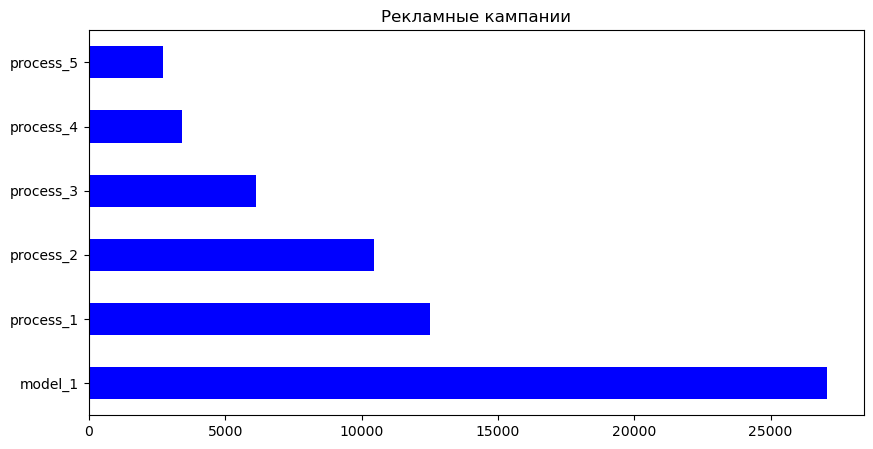

In [12]:
#Составляем график для сравнения кампаний

fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 5))

df_campaign.groups.value_counts().plot.barh(ax = ax1, color = 'blue')
ax1.set_title('Рекламные кампании')

Мы видим, что больше всего клиентов связано с кампанией для клиентов с высоким спросом на кредит по рекомендации математической модели (**'model_1'**).

Посмотрим на каналы связи наших кампаний.

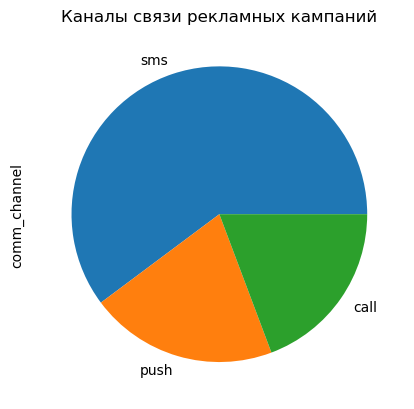

In [13]:
#Диаграмма каналов связи по рекламным кампаниям

fig, ax1 = plt.subplots()
df_campaign.comm_channel.value_counts(normalize = True).plot.pie(ax = ax1)

ax1.set_title("Каналы связи рекламных кампаний")

plt.show()

Оповещение по смс является самым распространенным каналом связи по рекламным кампаниям.

In [14]:
#Сделаем то же самое, только для услуг

df_product = df.loc[df['groups'].str.contains('product_1_1|product_1_2|product_2_1|product_2_2|product_3', case = False, na = False)]
df_product

,partner,groups,comm_channel,comm_status,comm_date,fact
0,0,product_1_1,sms,1,06.05.2021,0.0
1,1,product_2_2,sms,1,21.05.2021,0.0
2,2,product_1_2,call,0,05.05.2021,0.0
3,3,product_1_1,call,0,26.05.2021,0.0
4,4,product_1_1,push,1,14.05.2021,0.0
...,...,...,...,...,...,...
524318,524318,product_1_1,sms,1,06.05.2021,0.0
524319,524319,product_1_1,push,1,06.05.2021,0.0
524320,524320,product_1_1,sms,1,06.05.2021,0.0
524321,524321,product_2_1,sms,1,28.05.2021,0.0


Text(0.5, 1.0, 'Услуги')

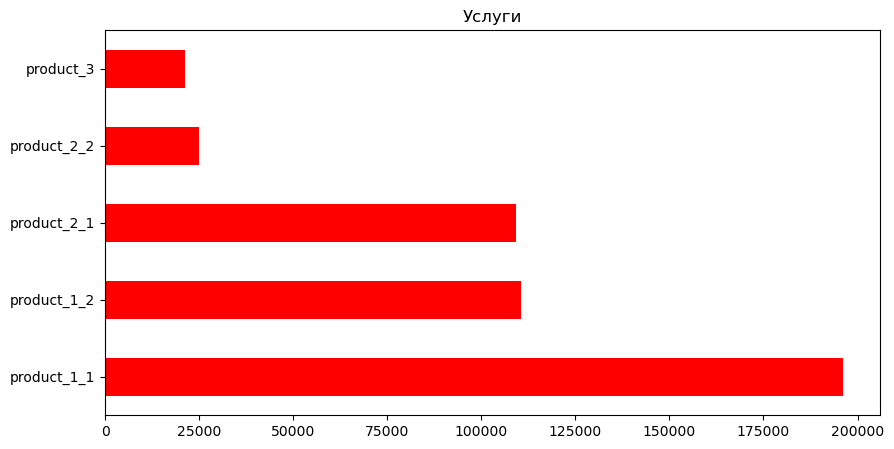

In [15]:
#Составляем график для сравнения услуг

fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 5))

df_product.groups.value_counts().plot.barh(ax = ax1, color = 'red')
ax1.set_title('Услуги')

Мы видим, что больше всего лидов связано с услугой по оформлению кредита на стандартных условиях и получению повышенного кэшбека следующий месяц.

Теперь взглянем на каналы связи услуг.

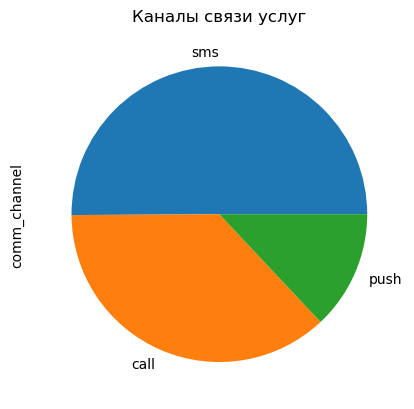

In [16]:
#Диаграмма каналов связи по услугам

fig, ax1 = plt.subplots()
df_product.comm_channel.value_counts(normalize = True).plot.pie(ax = ax1)

ax1.set_title("Каналы связи услуг")

plt.show()

Мы видим, что оповещение по смс превалирует над звонками и пушами.

Однако, важно заметить, что мы посмотрели на **все** оповещения. Это не означает, что клиенты с этими сообщениями ознакомились, так как у нас нет фильтрации по успешности коммуникации. Сейчас мы видим как успешные, так и не успешные коммуникации.

Для того, чтобы посмотреть статистику с учетом успешных коммуникаций, нам нужно отфильтровать наш датафрейм таким образом, чтобы ячейка **'comm_status'** равнялась 1.

In [17]:
#Сначала фильтруем по кампаниям

df_campaign_comm_success = df_campaign.loc[df_campaign['comm_status'] == 1]
df_campaign_comm_success

,partner,groups,comm_channel,comm_status,comm_date,fact
49,49,process_2,sms,1,13.05.2021,0.0
51,51,process_1,sms,1,13.05.2021,0.0
102,102,process_2,push,1,12.05.2021,0.0
103,103,process_2,sms,1,12.05.2021,0.0
152,152,process_1,sms,1,13.05.2021,0.0
...,...,...,...,...,...,...
524325,524325,process_5,sms,1,14.05.2021,0.0
524326,524326,process_5,sms,1,14.05.2021,0.0
524327,524327,process_5,sms,1,14.05.2021,0.0
524328,524328,process_5,sms,1,14.05.2021,0.0


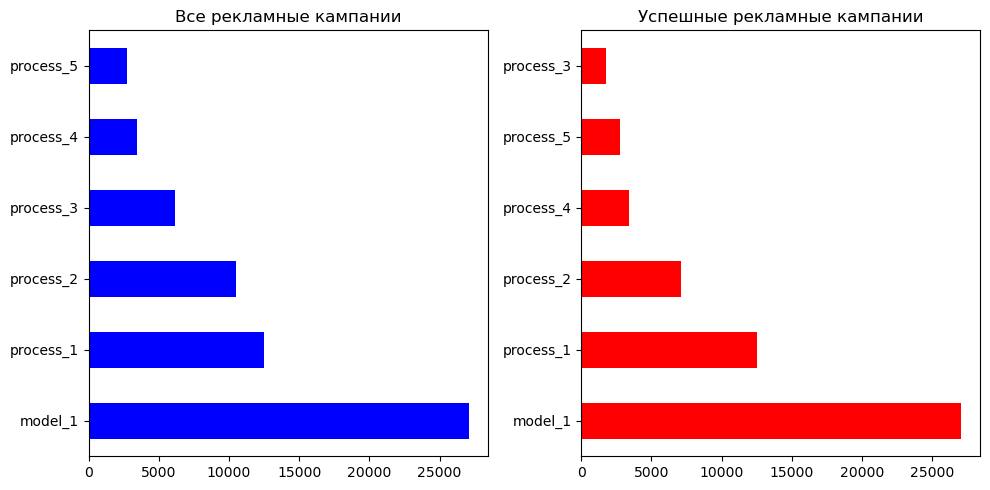

In [18]:
#Составим графики для успешных и неуспешных кампаний

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df_campaign.groups.value_counts().plot.barh(ax = ax1, color = 'blue')
ax1.set_title('Все рекламные кампании')

df_campaign_comm_success.groups.value_counts().plot.barh(ax = ax2, color = 'red')
ax2.set_title('Успешные рекламные кампании')

plt.tight_layout()
plt.show()

Сравнив графики по рекламным кампаниям мы приходим к выводу, что математическая модель (**'model_1'**) является самой эффективной кампанией по продвижению услуг кредитования. 

Отметим также, что кампания для клиентов, у которых уже есть один кредит в банке (**'process_3'**) после фильтрации по успешности коммуникации показывает себя хуже всего.

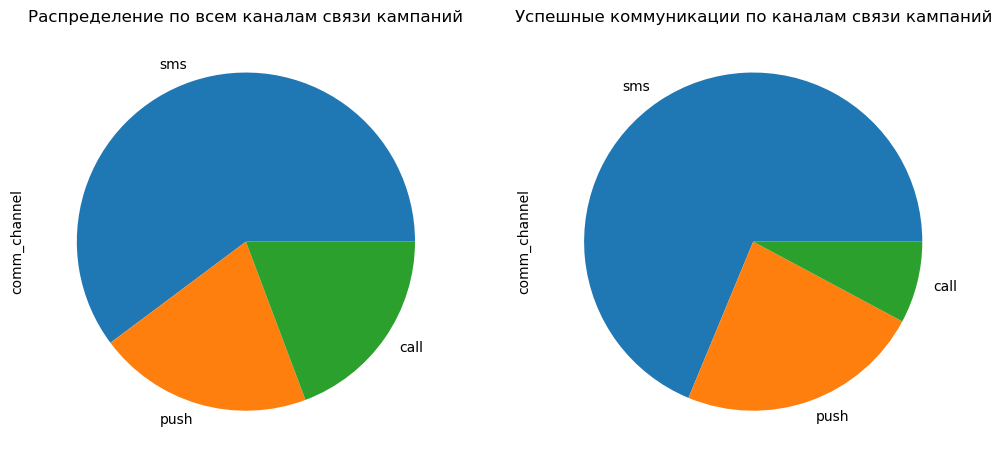

In [19]:
#Составим диаграммы для успешных и неуспешных каналов связи по рекламным кампаниям

fig, axs = plt.subplots(1, 2, figsize = (12, 6))

df_campaign.comm_channel.value_counts(normalize = True).plot.pie(ax = axs[0])
axs[0].set_title('Распределение по всем каналам связи кампаний')

df_campaign_comm_success.comm_channel.value_counts(normalize = True).plot.pie(ax = axs[1])
axs[1].set_title('Успешные коммуникации по каналам связи кампаний')

plt.show()

Сравнив каналы коммуникации рекламных кампаний мы приходим к выводу, что оповещение по **смс** является самым эффективным каналом для коммуникации с клиентом. При этом звонки являются самым неэффективным каналом.

In [20]:
#Теперь фильтруем по услугам

df_product_comm_success = df_product.loc[df_product['comm_status'] == 1]
df_product_comm_success

,partner,groups,comm_channel,comm_status,comm_date,fact
0,0,product_1_1,sms,1,06.05.2021,0.0
1,1,product_2_2,sms,1,21.05.2021,0.0
4,4,product_1_1,push,1,14.05.2021,0.0
5,5,product_1_1,sms,1,14.05.2021,0.0
7,7,product_1_2,call,1,01.05.2021,0.0
...,...,...,...,...,...,...
524318,524318,product_1_1,sms,1,06.05.2021,0.0
524319,524319,product_1_1,push,1,06.05.2021,0.0
524320,524320,product_1_1,sms,1,06.05.2021,0.0
524321,524321,product_2_1,sms,1,28.05.2021,0.0


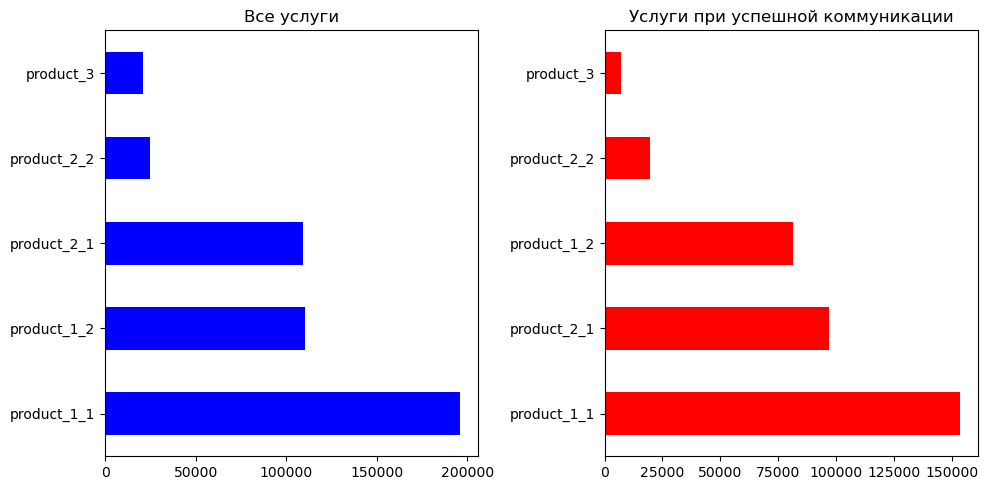

In [21]:
#Составим графики для успешных и неуспешных услуг

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

df_product.groups.value_counts().plot.barh(ax = ax1, color = 'blue')
ax1.set_title('Все услуги')

df_product_comm_success.groups.value_counts().plot.barh(ax = ax2, color = 'red')
ax2.set_title('Услуги при успешной коммуникации')

plt.tight_layout()
plt.show()

Мы видим, что самой популярной услугой является оформление кредита на стандартных условиях и получение повышенного кэшбека на следующий месяц (**'product_1_1'**).

Оформление кредита в мобильном банке без дополнительных документов (**'product_1_2'**) по факту коммуникации оказалась несколько хуже, чем оформление кредита на индивидуальных предрасчитанных условиях с определенной ставкой и суммой кредита (**'product_2_1'**).

Оформление кредита со сниженной ставкой при условии оформления страховки (**'product_3'**) показывает себя хуже всего на обеих графиках, причем после фильтрации по успешности коммуникации показатель снижается весьма значительно.



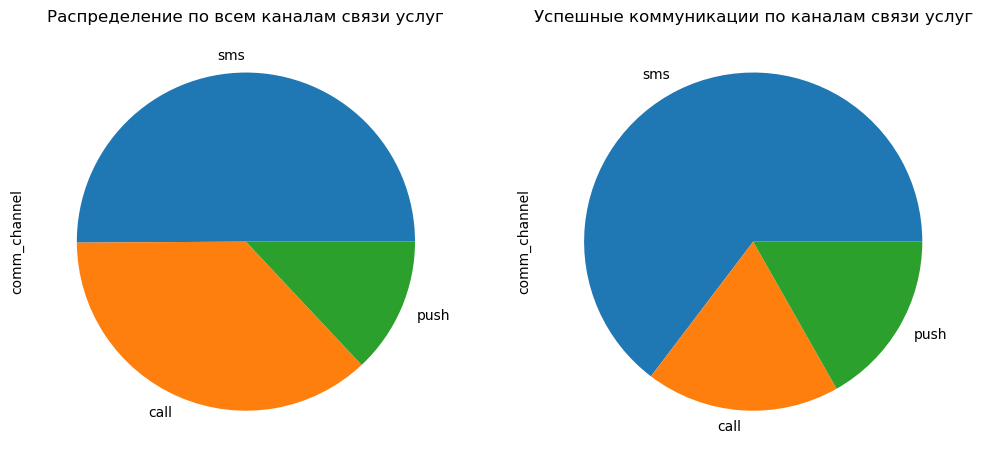

In [22]:
#Составим диаграммы для успешных и неуспешных каналов связи по услугам

fig, axs = plt.subplots(1, 2, figsize = (12, 6))

df_product.comm_channel.value_counts(normalize = True).plot.pie(ax = axs[0])
axs[0].set_title('Распределение по всем каналам связи услуг')

df_product_comm_success.comm_channel.value_counts(normalize = True).plot.pie(ax = axs[1])
axs[1].set_title('Успешные коммуникации по каналам связи услуг')

plt.show()

В услугах так же, как и в рекламных кампаниях превалирует коммуникация по **смс**, при этом звонки и пуши находятся на равном уровне.

## 2.2. Даты

Чтобы понять, влияет ли столбец **'comm_date'** на что-либо в нашем анализе создадим две колонки с днем недели **'day_of_week'** и месяцем **'month'** на основе **'comm_date'** и визуализируем их на графике.

In [23]:
#Скопируем первичный датафрейм в новый

df_dates = df.copy()

#Переведем даты в читаемый формат

df_dates['comm_date'] = pd.to_datetime(df_dates['comm_date'])

#Создадим столбцы с днем недели и месяцем и выведем полученый датафрейм

df_dates['day_of_week'] = df_dates['comm_date'].dt.day_name()
df_dates['month'] = df_dates['comm_date'].dt.month_name()
df_dates

,partner,groups,comm_channel,comm_status,comm_date,fact,day_of_week,month
0,0,product_1_1,sms,1,2021-06-05,0.0,Saturday,June
1,1,product_2_2,sms,1,2021-05-21,0.0,Friday,May
2,2,product_1_2,call,0,2021-05-05,0.0,Wednesday,May
3,3,product_1_1,call,0,2021-05-26,0.0,Wednesday,May
4,4,product_1_1,push,1,2021-05-14,0.0,Friday,May
...,...,...,...,...,...,...,...,...
524325,524325,process_5,sms,1,2021-05-14,0.0,Friday,May
524326,524326,process_5,sms,1,2021-05-14,0.0,Friday,May
524327,524327,process_5,sms,1,2021-05-14,0.0,Friday,May
524328,524328,process_5,sms,1,2021-05-14,0.0,Friday,May


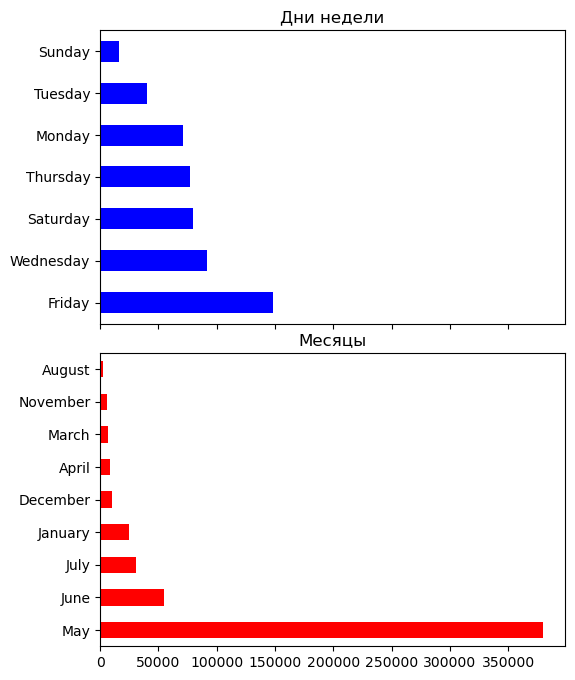

In [24]:
#Составим графики для дней недели и месяцев в нашем датафрейме

fig, axs = plt.subplots(2, 1, figsize = (6, 8), sharex = True)

df_dates.day_of_week.value_counts().plot.barh(ax = axs[0], color = 'blue')
axs[0].set_title('Дни недели')

df_dates.month.value_counts().plot.barh(ax = axs[1], color = 'red')
axs[1].set_title('Месяцы')

plt.subplots_adjust(hspace = 0.1)
plt.show()

* На основе полученных данных мы видим, что больше всего записей приходятся на пятницу. 
* Также большее количество данных приходится на май. 

Однако, за основу мы взяли наш первичный датафрейм, в котором убраны NaN значения. 

Для анализа нам следует взять уже распределенные по рекламным кампаниям и услугам датафреймы, в которых **'comm_status'** = 1 для того, чтобы мы могли сделать вывод о том, в какие месяцы и дни недели клиенты чаще откликаются.

Мы видим, что по рекламным кампаниям коммуникация успешнее всего происходит по **вторникам**. Затем идут четверг и понедельник. Больше всего коммуникаций приходится на май.

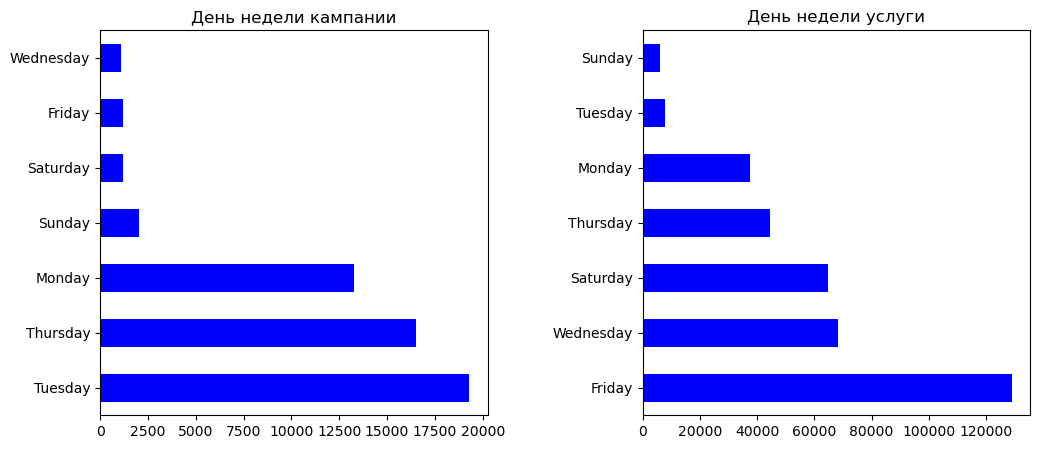

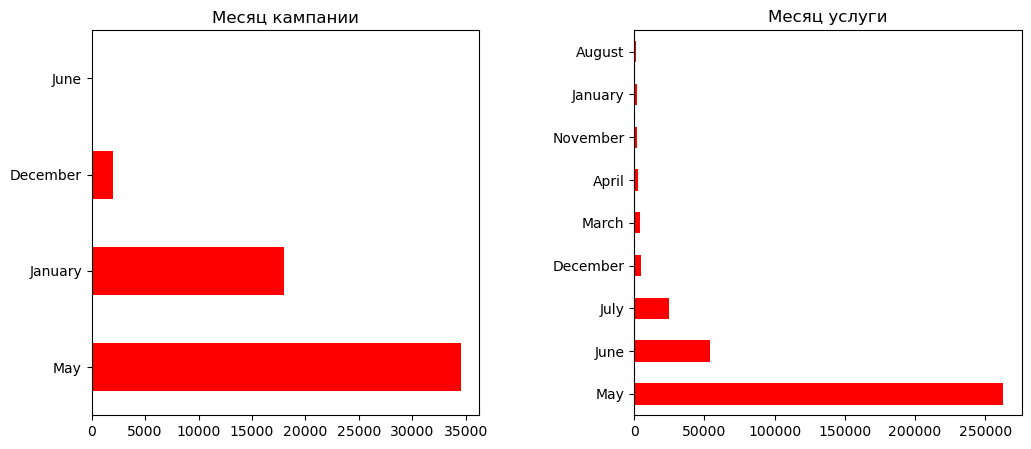

In [25]:
df_dates_campaign = df_dates.loc[df_dates['groups'].str.contains('model_1|process_1|process_2|process_3|process_4|process_5', case = False, na = False)]
df_dates_campaign = df_dates_campaign.loc[df_dates_campaign['comm_status'] == 1]

df_dates_product = df_dates.loc[df_dates['groups'].str.contains('product_1_1|product_1_2|product_2_1|product_2_2|product_3', case = False, na = False)]
df_dates_product = df_dates_product.loc[df_dates_product['comm_status'] == 1]

#Создаем графики для отображения по дням недели

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

df_dates_campaign.day_of_week.value_counts().plot.barh(ax = ax1, color = 'blue')
ax1.set_title('День недели кампании')

df_dates_product.day_of_week.value_counts().plot.barh(ax = ax2, color = 'blue')
ax2.set_title('День недели услуги')

plt.subplots_adjust(wspace=0.4)
plt.show()

#Создаем графики для отображения по месяцам

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

df_dates_campaign.month.value_counts().plot.barh(ax = ax1, color = 'red')
ax1.set_title('Месяц кампании')

df_dates_product.month.value_counts().plot.barh(ax = ax2, color = 'red')
ax2.set_title('Месяц услуги')

plt.subplots_adjust(wspace = 0.4)
plt.show()

По услугам коммуникация успешнее всего показывает себя по **пятницам**, меньше по средам и субботам. При этом больше всего комуникаций приходится так же на май.

Мы видим, что разброс записей по датам слишком велик для того, чтобы учитывать признак по дате в дальнейшей работе, поэтому мы не будем отталкиваться от значений даты и использовать связанные с ней метрики.

## 2.3. Считаем затраты на рекламу

Мы уже составили датафреймы, в которых **'comm_status'** = 1, а значит, на основе этих даных мы сейчас можем посчитать затраты:
1. Общие затраты по всем каналам связи вне зависимости от того, кампания или услуга;
2. Затраты по каждому продукту и услуге по отдельности.

In [26]:
#Создадим словарь с затратами на одну единицу каждого способа коммуникации

cost = dict(call = 15, sms = 4, push = 0.2)

#Создадим датафрейм, в котором построчно будут указны затраты на коммуникацию в зависимости от ее типа

df_cost = df.loc[df['comm_status'] == 1]

df_cost['cost'] = df_cost['comm_channel'].map(cost) * df_cost['comm_status']

df_cost

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,partner,groups,comm_channel,comm_status,comm_date,fact,cost
0,0,product_1_1,sms,1,06.05.2021,0.0,4.0
1,1,product_2_2,sms,1,21.05.2021,0.0,4.0
4,4,product_1_1,push,1,14.05.2021,0.0,0.2
5,5,product_1_1,sms,1,14.05.2021,0.0,4.0
7,7,product_1_2,call,1,01.05.2021,0.0,15.0
...,...,...,...,...,...,...,...
524325,524325,process_5,sms,1,14.05.2021,0.0,4.0
524326,524326,process_5,sms,1,14.05.2021,0.0,4.0
524327,524327,process_5,sms,1,14.05.2021,0.0,4.0
524328,524328,process_5,sms,1,14.05.2021,0.0,4.0


In [27]:
#Посчитаем общие затраты на рекламу

df_cost.agg({'cost' : ['sum']})

,cost
sum,2150063.2


Итого на рекламу было затрачено 2 млн 150 тыс. 63 р. 20 к.

In [28]:
#Затраты на рекламу по каждому каналу

df_cost_all = df_cost.pivot_table(index = 'comm_channel', values = 'cost', aggfunc = 'sum')
df_cost_all

,cost
comm_channel,
call,1059645.0
push,14574.2
sms,1075844.0


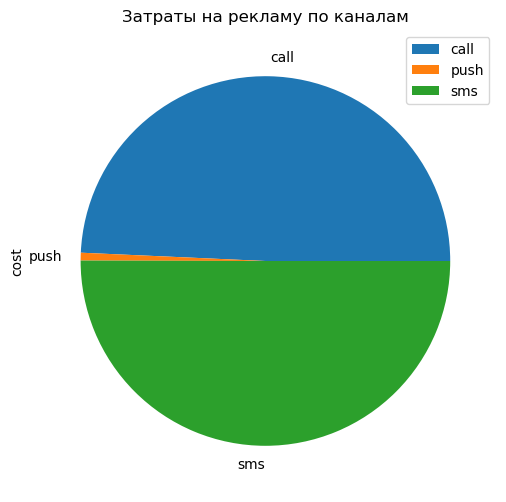

In [29]:
#Составим график, чтобы было нагляднее

df_cost_all.plot.pie(y = 'cost', figsize = (6, 6))
plt.title('Затраты на рекламу по каналам')
plt.show()

Мы посчитали общие затраты на рекламу и затраты по каждому каналу по отдельности.

* **Звонки** - 1 млн 59 тыс. 45 р.
* **СМС** - 1 млн 75 тыс. 844 р.
* **Пуши** - 14 тыс. 574 р. 20 к.

Теперь посчитаем затраты по каждой рекламной кампании и услуге. Дополнительно создадим столбцы по затратам в каналах коммуникации.

In [30]:
#Посчитаем затраты по каждому каналу связи в рекламных кампаниях

df_campaign_cost = df_cost.loc[df_cost['groups'].str.contains('model_1|process_1|process_2|process_3|process_4|process_5', case = False, na = False)]
df_campaign_cost = df_campaign_cost.pivot_table(index = 'groups', columns = 'comm_channel', values = 'cost', aggfunc = 'sum', fill_value = 0)
df_campaign_cost = df_campaign_cost[['call', 'sms', 'push']]

df_campaign_cost = df_campaign_cost.assign(cost = df_campaign_cost['call'] + df_campaign_cost['sms'] + df_campaign_cost['push'])

df_campaign_cost

comm_channel,call,sms,push,cost
groups,,,,
model_1,0,72616,1782.4,74398.4
process_1,0,40988,452.0,41440.0
process_2,37620,12968,268.2,50856.2
process_3,26370,0,0.0,26370.0
process_4,0,12936,35.4,12971.4
process_5,0,10556,19.6,10575.6


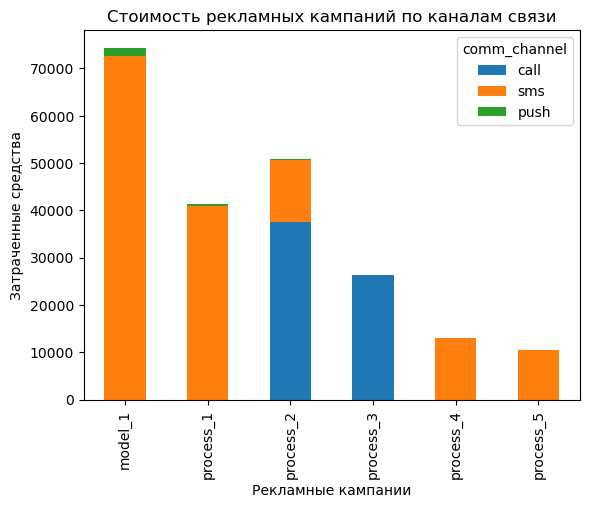

In [31]:
#Избавимся от колонки 'cost', чтобы она не мешала нам составить график

df_campaign_no_cost_all = df_campaign_cost.drop(columns=['cost'])
df_campaign_no_cost_all

#Составляем график для рекламных кампаний

df_campaign_no_cost_all.plot(kind = 'bar', stacked = True)

plt.title('Стоимость рекламных кампаний по каналам связи')
plt.xlabel('Рекламные кампании')
plt.ylabel('Затраченные средства')

plt.show()

In [32]:
#Посчитаем затраты по каждому каналу связи в услугах

df_product_cost = df_cost.loc[df_cost['groups'].str.contains('product_1_1|product_1_2|product_2_1|product_2_2|product_3', case = False, na = False)]
df_product_cost = df_product_cost.pivot_table(index = 'groups', columns = 'comm_channel', values = 'cost', aggfunc = 'sum', fill_value = 0)
df_product_cost = df_product_cost[['call', 'sms', 'push']]

df_product_cost = df_product_cost.assign(cost = df_product_cost['call'] + df_product_cost['sms'] + df_product_cost['push'])

df_product_cost

comm_channel,call,sms,push,cost
groups,,,,
product_1_1,393255,431560,3855.6,828670.6
product_1_2,294225,182752,3210.4,480187.4
product_2_1,159930,264536,4003.8,428469.8
product_2_2,44475,46932,946.8,92353.8
product_3,103770,0,0.0,103770.0


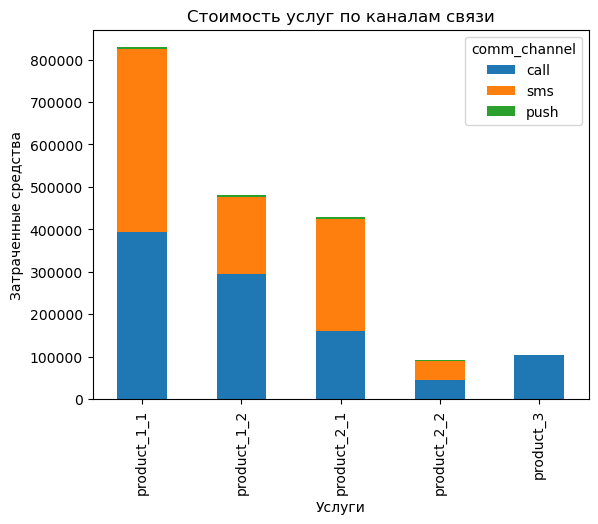

In [33]:
#Избавимся от колонки 'cost', чтобы она не мешала нам составить график

df_product_no_cost_all = df_product_cost.drop(columns=['cost'])
df_product_no_cost_all

#Составляем график для услуг

df_product_no_cost_all.plot(kind = 'bar', stacked = True)

plt.title('Стоимость услуг по каналам связи')
plt.xlabel('Услуги')
plt.ylabel('Затраченные средства')

plt.show()

## 2.4. Определяем и рассчитываем метрики

У нас нет данных о каких-либо доходах после подписания договора, а временные периоды распределены слишком неравномерно, поэтому мы не будем использовать такие метрики, как ROI, ROMI, ROAS, ARPU, ARPPU, CAC и LTV, а в качестве промежутка времени мы будем брать все имеющиеся записи.

Зато мы можем посчитать такие метрики, как:
* **CPL** - Cost per Lead = стоимость одного лида (затраты на рекламу / количество лидов). Лидом мы называем тех потенциальных клиентов, с кем коммуникация была успешной;
* **CPA** - Cost per Action = стоимость одного подписанного договра = затраты на рекламу / количество подписанных договоров ('fact' = 1);
* **CR** - Conversion Rate = конверсия лидов, или же сколько клиентов подписало договор после успешной коммуникаци (100 * ('fact' = 1 / 'comm_status' = 1));

# CPL

In [34]:
#Скопируем датафрейм с суммами по рекламным кампаниям в новый

df_campaign_cpl = df_campaign_cost.copy()

#Посчитаем количество клиентов

df_campaign_cpl['partner'] = df_cost.groupby('groups').size()

#Посчитаем метрику для каждого канала связи

df_campaign_cpl['cpl_total'] = df_campaign_cpl['cost'] / df_campaign_cpl['partner']
df_campaign_cpl['cpl_call'] = df_campaign_cpl['call'] / df_campaign_cpl['partner']
df_campaign_cpl['cpl_sms'] = df_campaign_cpl['sms'] / df_campaign_cpl['partner']
df_campaign_cpl['cpl_push'] = df_campaign_cpl['push'] / df_campaign_cpl['partner']

df_campaign_cpl

comm_channel,call,sms,push,cost,partner,cpl_total,cpl_call,cpl_sms,cpl_push
groups,,,,,,,,,
model_1,0,72616,1782.4,74398.4,27066,2.748777,0.000000,2.682923,0.065854
process_1,0,40988,452.0,41440.0,12507,3.313345,0.000000,3.277205,0.036140
process_2,37620,12968,268.2,50856.2,7091,7.171936,5.305317,1.828797,0.037823
process_3,26370,0,0.0,26370.0,1758,15.000000,15.000000,0.000000,0.000000
process_4,0,12936,35.4,12971.4,3411,3.802814,0.000000,3.792436,0.010378
process_5,0,10556,19.6,10575.6,2737,3.863939,0.000000,3.856777,0.007161


In [35]:
#Скопируем датафрейм с суммами по услугам в новый

df_product_cpl = df_product_cost.copy()

#Посчитаем количество клиентов

df_product_cpl['partner'] = df_cost.groupby('groups').size()

#Посчитаем метрику для каждого канала связи

df_product_cpl['cpl_total'] = df_product_cpl['cost'] / df_product_cpl['partner'] 
df_product_cpl['cpl_call'] = df_product_cpl['call'] / df_product_cpl['partner']
df_product_cpl['cpl_sms'] = df_product_cpl['sms'] / df_product_cpl['partner']
df_product_cpl['cpl_push'] = df_product_cpl['push'] / df_product_cpl['partner']

df_product_cpl

comm_channel,call,sms,push,cost,partner,cpl_total,cpl_call,cpl_sms,cpl_push
groups,,,,,,,,,
product_1_1,393255,431560,3855.6,828670.6,153385,5.402553,2.563843,2.813574,0.025137
product_1_2,294225,182752,3210.4,480187.4,81355,5.902371,3.616557,2.246352,0.039462
product_2_1,159930,264536,4003.8,428469.8,96815,4.425655,1.651913,2.732387,0.041355
product_2_2,44475,46932,946.8,92353.8,19432,4.752666,2.288751,2.415191,0.048724
product_3,103770,0,0.0,103770.0,6918,15.000000,15.000000,0.000000,0.000000


# CPA

In [36]:
df_campaign_cpa = df_cost.loc[df_cost['groups'].str.contains('model_1|process_1|process_2|process_3|process_4|process_5', case = False, na = False)]
df_campaign_cpa = df_campaign_cpa.groupby(['groups']).agg('sum')
df_campaign_cpa = df_campaign_cpa.drop(df_campaign_cpa.columns[[0, 1]], axis = 1)

#Создаем столбцы для каждого канала связи

df_campaign_cpa['call'] = df_campaign_cost['call']
df_campaign_cpa['sms'] = df_campaign_cost['sms']
df_campaign_cpa['push'] = df_campaign_cost['push']

#Считаем метрики по каналам

df_campaign_cpa['cpa_total'] = df_campaign_cpa['cost'] / df_campaign_cpa['fact']
df_campaign_cpa['cpa_call'] = df_campaign_cpa['call'] / df_campaign_cpa['fact'] 
df_campaign_cpa['cpa_sms'] = df_campaign_cpa['sms'] / df_campaign_cpa['fact'] 
df_campaign_cpa['cpa_push'] = df_campaign_cpa['push'] / df_campaign_cpa['fact'] 

df_campaign_cpa

,fact,cost,call,sms,push,cpa_total,cpa_call,cpa_sms,cpa_push
groups,,,,,,,,,
model_1,748.0,74398.4,0,72616,1782.4,99.463102,0.000000,97.080214,2.382888
process_1,127.0,41440.0,0,40988,452.0,326.299213,0.000000,322.740157,3.559055
process_2,72.0,50856.2,37620,12968,268.2,706.336111,522.500000,180.111111,3.725000
process_3,33.0,26370.0,26370,0,0.0,799.090909,799.090909,0.000000,0.000000
process_4,24.0,12971.4,0,12936,35.4,540.475000,0.000000,539.000000,1.475000
process_5,1.0,10575.6,0,10556,19.6,10575.600000,0.000000,10556.000000,19.600000


In [37]:
df_product_cpa = df_cost.loc[df_cost['groups'].str.contains('product_1_1|product_1_2|product_2_1|product_2_2|product_3', case = False, na = False)]
df_product_cpa = df_product_cpa.groupby(['groups']).agg('sum')
df_product_cpa = df_product_cpa.drop(df_product_cpa.columns[[0, 1]], axis = 1)

#Создаем столбцы для каждого канала связи

df_product_cpa['call'] = df_product_cost['call']
df_product_cpa['sms'] = df_product_cost['sms']
df_product_cpa['push'] = df_product_cost['push']

#Считаем метрики по каналам

df_product_cpa['cpa_total'] = df_product_cpa['cost'] / df_product_cpa['fact'] 
df_product_cpa['cpa_call'] = df_product_cpa['call'] / df_product_cpa['fact'] 
df_product_cpa['cpa_sms'] = df_product_cpa['sms'] / df_product_cpa['fact'] 
df_product_cpa['cpa_push'] = df_product_cpa['push'] / df_product_cpa['fact'] 

df_product_cpa

,fact,cost,call,sms,push,cpa_total,cpa_call,cpa_sms,cpa_push
groups,,,,,,,,,
product_1_1,1486.0,828670.6,393255,431560,3855.6,557.651817,264.639973,290.417227,2.594616
product_1_2,661.0,480187.4,294225,182752,3210.4,726.455976,445.121029,276.478064,4.856884
product_2_1,1954.0,428469.8,159930,264536,4003.8,219.278301,81.847492,135.381781,2.049028
product_2_2,396.0,92353.8,44475,46932,946.8,233.216667,112.310606,118.515152,2.390909
product_3,164.0,103770.0,103770,0,0.0,632.743902,632.743902,0.000000,0.000000


# CR

In [38]:
#Фильтруем данные по факту и статусу

fact_campaign = df_campaign.loc[df_campaign['fact'] == 1]
fact_campaign = fact_campaign.loc[fact_campaign['comm_status'] == 1]

#Группируем по кампаниям и считаем количество договоров

fact_comm_camp = df_cost.loc[df_cost['groups'].str.contains('model_1|process_1|process_2|process_3|process_4|process_5', case = False, na = False)]
fact_comm_camp = fact_comm_camp.groupby(['groups']).agg('sum')
fact_comm_camp = fact_comm_camp.drop(fact_comm_camp.columns[[0, 1, 2, 3]], axis = 1)
fact_comm_camp['fact_count'] = df_cost.groupby('groups').size()

#Группируем по кампаниям и считаем количество клиентов

fact_campaign_1 = df_cost.loc[df_cost['groups'].str.contains('model_1|process_1|process_2|process_3|process_4|process_5', case = False, na = False)]
fact_campaign_1 = fact_campaign_1.groupby(['groups']).agg('sum')
fact_campaign_1 = fact_campaign_1.drop(fact_campaign_1.columns[[0, 1, 2, 3]], axis = 1)

#Записываем полученные данные в колонки

fact_campaign_1['fact_count'] = fact_campaign.groupby('groups').size()
fact_campaign_1['partner_count'] = fact_comm_camp['fact_count']

#Считаем конверсию по рекламным кампаниям

fact_campaign_1['conversion_rate'] = (fact_campaign_1['fact_count'] / fact_campaign_1['partner_count']) * 100

fact_campaign_1

,fact_count,partner_count,conversion_rate
groups,,,
model_1,748,27066,2.763615
process_1,127,12507,1.015431
process_2,72,7091,1.015372
process_3,33,1758,1.877133
process_4,24,3411,0.703606
process_5,1,2737,0.036536


In [39]:
#Фильтруем данные по факту и статусу

fact_product = df_product.loc[df_product['fact'] == 1]
fact_product = fact_product.loc[fact_product['comm_status'] == 1]

#Группируем по услугам и считаем количество договоров

fact_comm_prod = df_cost.loc[df_cost['groups'].str.contains('product_1_1|product_1_2|product_2_1|product_2_2|product_3', case = False, na = False)]
fact_comm_prod = fact_comm_prod.groupby(['groups']).agg('sum')
fact_comm_prod = fact_comm_prod.drop(fact_comm_prod.columns[[0, 1, 2, 3]], axis = 1)
fact_comm_prod['fact_count'] = df_cost.groupby('groups').size()

#Группируем по услугам и считаем количество клиентов

fact_prod_1 = df_cost.loc[df_cost['groups'].str.contains('product_1_1|product_1_2|product_2_1|product_2_2|product_3', case = False, na = False)]
fact_prod_1 = fact_prod_1.groupby(['groups']).agg('sum')
fact_prod_1 = fact_prod_1.drop(fact_prod_1.columns[[0, 1, 2, 3]], axis = 1)

#Записываем полученные данные в колонки

fact_prod_1['fact_count'] = fact_product.groupby('groups').size()
fact_prod_1['partner_count'] = fact_comm_prod['fact_count']

#Считаем конверсию по услугам

fact_prod_1['conversion_rate'] = (fact_prod_1['fact_count'] / fact_prod_1['partner_count']) * 100

fact_prod_1

,fact_count,partner_count,conversion_rate
groups,,,
product_1_1,1486,153385,0.968804
product_1_2,661,81355,0.812488
product_2_1,1954,96815,2.018282
product_2_2,396,19432,2.037876
product_3,164,6918,2.370627


# 3. Выводы и рекомендации

На основе полученных нами инсайтов сделаем выводы и предложим рекомендации по улучшению эффективности затрат на рекламу оформления кредита в банке.

## Выводы

1. Кажется, что, несмотря на высокий разброс по датам, их можно было бы использовать в нашей работе. Однако, разброс слишком велик. К тому же у нас каждый клиент является уникальным и нет какой-то периодичности по клиенту. Если бы у нас было указано, что клиент №1 откликался, допустим, в апреле, мае и июне, то мы бы могли взять этот период и посмотреть на жизненный цикл клиента. Также мы могли бы сделать выводы, к чему он больше расположен, на какие предложения охотнее откликается и что ему выгоднее продвигать.
2. У нас нет данных по доходам с каждой рекламной кампании или продвижения услуги. Мы не знаем, сколько нам это приносит денег, так как мы знаем только расходы. Предположить мы тоже не можем, потому что кажется, что по разным кампаниям своя доходность. Например, математичекая модель (**'model_1'**) может приносить доход в 10 тыс. руб. с одного клиента, а кампания для клиентов, склоных к оттоку из банка (**'process_5'**) может приносить 100 руб. с одного клиента. Данных у нас нет, а значит и подробнее посмотреть во что эффективнее будет вкладываться мы не можем.
3. На основе полученных данных мы делаем вывод, что в рекламных кампаниях математическая модель **'model_1'** показывает себя лучше всего в коммуникации с клиентом по **СМС**. Эта модель обладает лучшими показателями по привлечению лидов и стоимость подписания одного договора по рекомендаци математической модели дешевле всего (**97 руб.** при оповещении по смс, звонки по ней абсолютно неактуальны, а пуши неэффективны). При этом у нее самый высокий показатель конверсии (**2.8%**) по сравнению с другими рекламными кампаниями.
4. Очень высокий процент конверсии у рекламной кампании **'process_3'** (**1.88%**). Однако она не самая успешная, стоимость лида по ней составляет **15 руб.**, так как оповещение осуществляется только с помощью звонков. Из-за этого данная рекламная кампания вторая по стоимости договора (**799 руб.**). 
5. Кампания **'process_5'** самая неэффективная. Процент конверсии составляет всего **0.04%**, стоимость одного договора составляет **10575.6 руб.**. 
5. Также, на основе полученных данных по услугам мы делаем вывод, что самой эффективной является предложение по оформлению кредита на стандартных условиях и получиние повышенного кэшбека на следующий месяц (**'product_1_1'**). Однако, эта услуга не самая популярная по привлечению лидов и стоит на 3-м месте по стоимости подписания одного договора (**'558 руб.'**). К тому же, она стоит на предпоследнем месте по конверсии (**0.97%**), а значит, мы теряем на ней средства. 
6. У услуги **'product_1_2'** низкий показатель конверсии (**0.81%**) и при этом она является третьей по успешности коммуникации. У нее самая высокая стоимость договора (**726 руб.**) и вторая по затратности стоимость лида (**5.9 руб.**). Ее нужно оптимизировать, возможно, судя по графику, возникает проблема с тем, чтобы заинтересовать клиента.

## Рекомендации

1. Кажется, что для увеличения конверсии по 'product_1_1' нам следует перенаправить трафик в смс, так как коммуникация по смс показывает себя лучше всего. Возможно, это поможет вывести данную услугу в плюс.
2. Мы теряем очень много средств на продвижение услуги 'product_3', так как оповещение по этой услуге идет исключительно посредством звонков. Стоимость одного лида равна сумме за звонок (**15 руб.**), а стоимость подписания договора по ней вторая по стоимости (**633 руб.**). Однако, у этой услуги самый высокий процент конверсии (**2.37%**). Возможно, подключение других каналов связи по данной услуге позволит сохранить конверсию и снизить затраты на лида и договор.
3. Для кампании **'process_3'** следует подключить другие каналы связи помимо звонков.
4. Следует пересмотреть кампанию **'process_5'** ввиду ее тотальной неэффективности.

## Что можно улучшить в работе

* Во-первых, нужно оптимизировать код для расчета метрики Conversion Rate. Код хоть и рабочий, но трудночитаемый. Разобраться в нем довольно проблематично.
* Во-вторых, мы не посчитали конверсию для каждого канала связи по отдельности. Мы посчитали общую конверсию. Для более объективной картины нам следует сравнивать показатели конверсии по каждому каналу связи. Тогда бы мы смогли посмотреть для некоторых рекламных кампаний и услуг конверсию по каналам и сделать вывод, куда лучше перенаправить средства. Например, мы бы могли сделать вывод о том, что пуши показывают в некоторых кампаниях более высокую конверсию по сравнению с другими каналами. Сейчас кажется, что пуши вообще не играют никакой роли.
* В-третьих, возможно, будь у нас больше данных, мы бы могли построить воронку продаж по каждой модели, чтобы посмотреть, на каком этапе отваливаются клиенты. Однако, у нас слишком мало данных для ее построения. У нас есть только статус коммуникации и подписание договора. Этого мало для ее построения.
* В-четвертых, в данных по датам слишком большой разброс. Так как каждый клиент уникальный и нет четкой периодичности, у нас нет возможности посмотреть на его поведение и дать рекомендации к рекламным кампаниям на основе поведенческих данных.

**P.S.** В ходе данной работы автор получил представление о том, как необходимо делать анализ рекламных кампаний на основе больших данных, применил знания Python и библиотек для анализа на практике, а также определил для себя необходимые точки роста.